### import libraries 

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime, time

try:
    import seaborn as sns
except:
    pass
try:
    import talib as ta
except:
    pass
try:
    import QUANTAXIS as QA
except:
    pass

from utils import *
# import statsmodels.api as sm
# import pandas_datareader.data as web

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

In [6]:
# prepare some data
code_list_by_sector = pd.read_excel('data/etf_pair_code.xlsx', dtype={'symbol':str})
sector_list = code_list_by_sector.sector.unique().tolist()
etf_list = code_list_by_sector.etf_symbol.unique().tolist()
region_list = code_list_by_sector.region.unique().tolist()

### calculate pair trading

#### 计算一组assets的pair trading

`Signature: `
```python
calc_pair_trading(symbol, data_source='us', is_saving=False, save_name=None, method='all', period=170, show_bar=False)
```
```
Docstring:
Implements:
    计算一组assets的pair trading, 并且可以选择是否存入到excel表中

Arguments:
    symbol -- 字符串数据类型 or pythonlist数据类型, 
              可以是etf 代码 或者 sector name; 
              也可以是一组Equity symbol构成的list
    data_source -- 字符串数据类型,
                -- 'us', 本地美股数据,
                -- 'hk', 本地港股数据,
                -- 'ol', 在线获取数据. (该功能暂未整合进去)
    is_saving -- 是否保存/保存哪些表 
              -- True, bool type, 保存所有的表进excel
              -- 'all', str type, 保存所有的表进excel
              -- "ratio","long_asset","long_return","long_short_return"中任意一个进行保存
              -- '0123', str type, 以数字代表4个key, 任意组合即为保存指定表
    save_name -- excel的文件名
              -- 若为None, 则随机生成一个8位英文字符的文件名
              -- str type, excel的文件名
    method -- 字符串数据类型, 表示采取何种求平均值的方法
                -- all, 表示用当前bar之前所有的ratio值求平均
                -- rolling, 表示用最近一段时间的ratio值做算术移动平均值
                -- ewm, 表示用最近一段时间的ratio值做指数移动平均值
    period -- integer, 当avg_method为rolling或者ewm时, 需要计算最近多少根bar的平均值
    show_bar -- 是否显示计算过程中的进度条
```

因为`calc_pair_trading()`需要知道etf代码和sector name,为了避免歧义,我做了限定,可以通过上面得到的list查看etf代码和sector name

In [ ]:
# 可以直接直接使用以下代码查看etf的symbol
etf_list

In [5]:
# 不过转成np.array的格式时, 会显示的更紧凑
np.array(etf_list)

array(['XLK', 'PNQI', 'CQQQ', 'GAMR', 'PSJ', 'SKYY', 'HACK', 'SOXX', 'SMH',
       'XLV', 'IBB', 'ITA', 'XLP', 'XLY', 'IAI', 'VDE', 'XLB'],
      dtype='<U4')

In [6]:
np.array(sector_list)

array(['Hardware', 'Internet', 'China Internet', 'Online Gaming',
       'Software/ Cloud Computing', 'Cloud Computing', 'Network/Security',
       'ePayment', 'Semiconductor', 'Medical', 'Biotech/ Pharma',
       'Health Care Services', 'Defense', 'Consumer', 'Financials',
       'Energy', 'Others'],
      dtype='<U25')

看看各个etf有多少个成分股

In [8]:
code_list_by_sector.etf_symbol.value_counts()

IBB     191
VDE     143
PNQI     95
CQQQ     78
GAMR     72
XLK      68
XLY      66
XLV      63
HACK     53
ITA      36
XLP      32
PSJ      31
SOXX     30
SKYY     29
IAI      27
SMH      25
XLB      24
Name: etf_symbol, dtype: int64

#### 我们现在以SMH来做演示

现在默认使用进度条, 如果我们现在我们不保存文件, 并且默认使用全部ratio计算平均值

In [20]:
result = calc_pair_trading('SMH')

可以看到，如果使用所有的ratio来计算平均值时, 速度会非常慢

所以这个时候我们选用移动算术平均来计算, 移动窗口设为245

In [7]:
arith_result_245 = calc_pair_trading('SMH', method='rolling', period=245)

查看某几个ratio

In [11]:
arith_result_245['ratio'][['INTC-TSM', 'INTC-AVGO', 'INTC-ASML']]

,INTC-TSM,INTC-AVGO,INTC-ASML
date,,,
2009-12-31,1.812475,0.973339,0.614919
2010-01-04,1.832693,0.966132,0.619037
2010-01-05,1.839760,0.958554,0.613958
2010-01-06,1.839972,0.947856,0.606344
2010-01-07,1.884608,0.944661,0.617686
2010-01-08,1.907367,0.948233,0.639894
2010-01-11,1.928781,0.947762,0.657537
2010-01-12,1.957772,0.946612,0.645879
2010-01-13,1.940247,0.993001,0.639111


对ratio计算bolling

In [12]:
# 取某一个标的的ratio
ratio_sample = arith_result_245['ratio'].iloc[:,0]

In [43]:
# 以指数移动平均的方式计算bolling
upper, middle, lower = ta.BBANDS(ratio_sample, matype=ta.MA_Type.T3)

In [24]:
BBands = pd.concat([ratio_sample, upper, middle, lower], axis=1)
BBands.columns = ['ratio', 'upper', 'middle', 'lower']

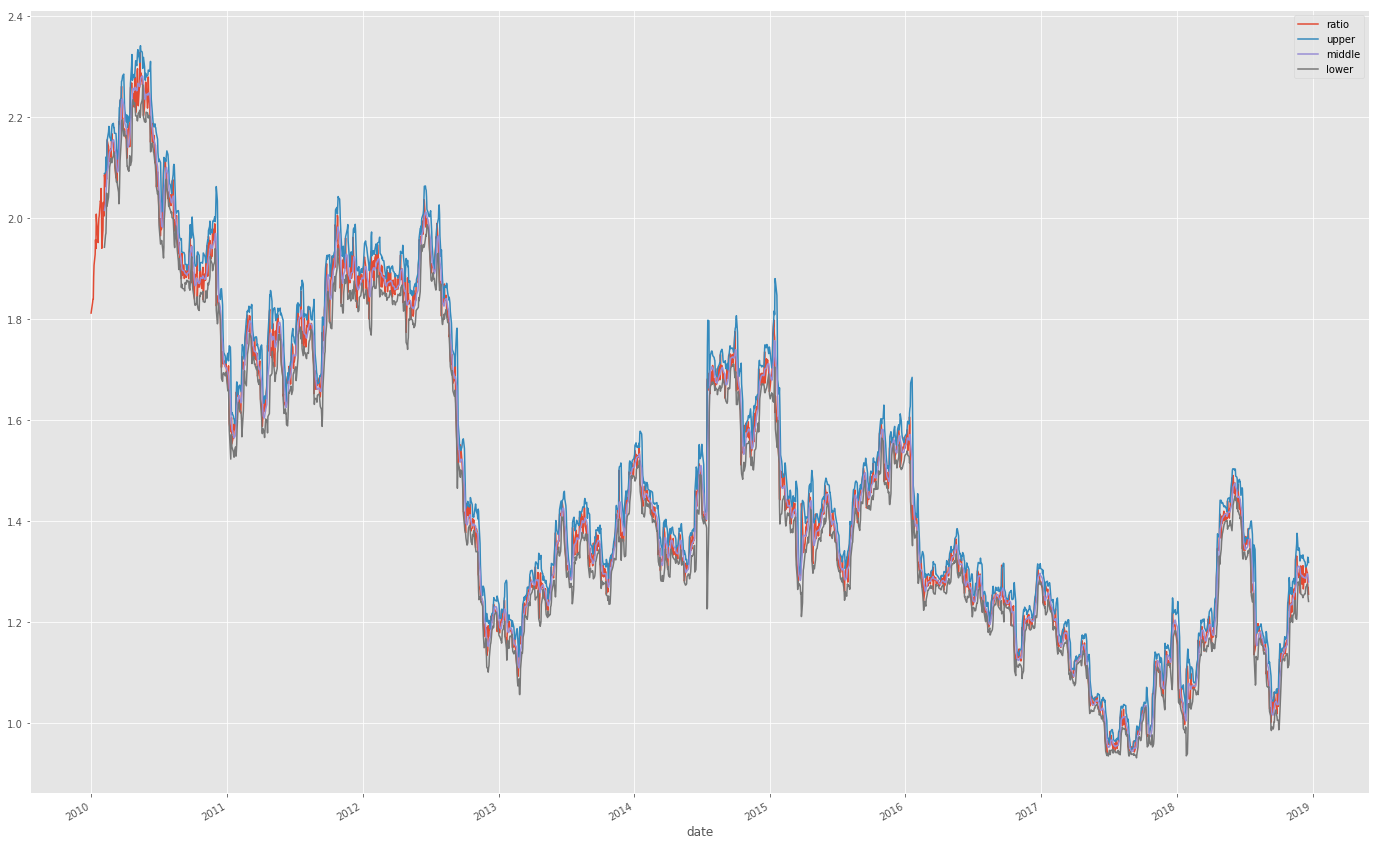

In [44]:
BBands.plot(figsize=[24, 16]);
# 可以右键在标签中查看图片，or 复制图片地址在新标签中查看大图

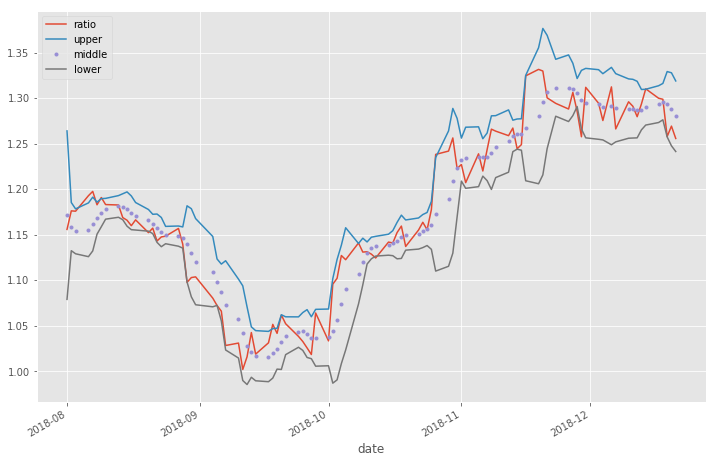

In [35]:
BBands[-100:].plot(style=['-', '-', '.', '-']);

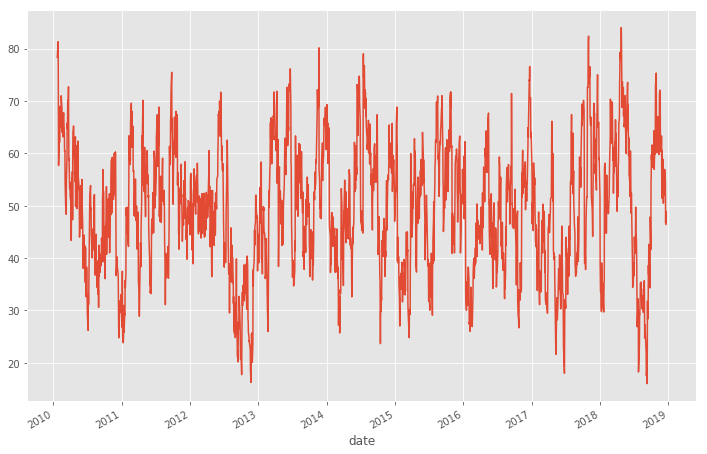

In [62]:
rsi = ta.RSI(ratio_sample, timeperiod=14)
rsi.plot();

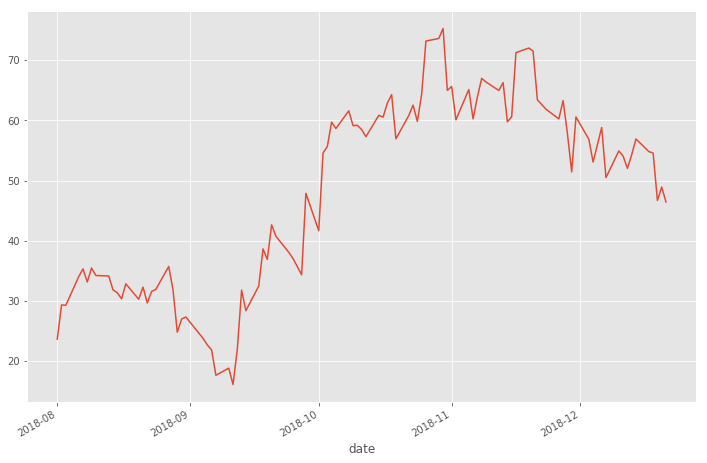

In [49]:
rsi[-100:].plot();

In [60]:
rsi_up, rsi_mid, rsi_low = ta.BBANDS(rsi, matype=ta.MA_Type.T3)
rsi_bands = pd.concat([rsi, rsi_up, rsi_mid, rsi_low], axis=1)
rsi_bands.columns = ['ratio_rsi', 'upper', 'middle', 'lower']

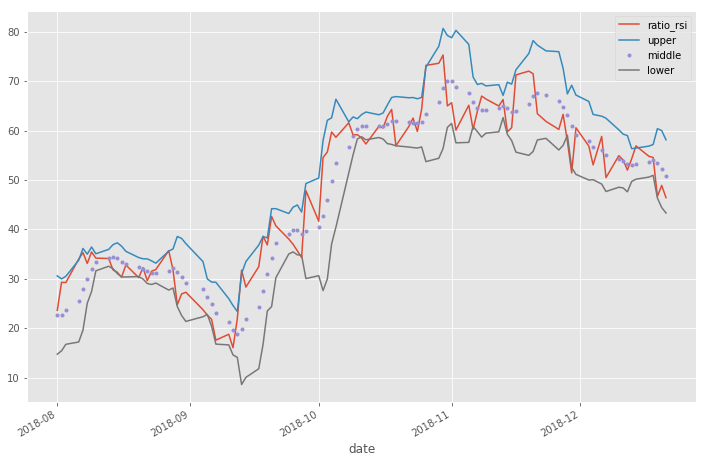

In [61]:
rsi_bands[-100:].plot(style=['-', '-', '.', '-']);

使用移动平均的方式可以看到运行速度非常快(28秒), 而默认的方式需要10分钟

默认方式下return的表现

In [38]:
print('default method long/short return : %.10f' % result['long_short_return'].sum().sum())
print('default method long return : %.10f' % result['long_return'].sum().sum())

default method long/short return : -0.0215810547
default method long return : 0.2239631074


移动算术平均return表现

In [39]:
print('arithmetic method long/short return : %.10f' % arith_result_245['long_short_return'].sum().sum())
print('arithmetic method long return : %.10f' % arith_result_245['long_return'].sum().sum())

arithmetic method long/short return : 0.0247123504
arithmetic method long return : 0.2469689453


不同周期下的表现

In [27]:
result_170 = calc_pair_trading('SMH', method='rolling', period=170)

In [40]:
print('method:arith, period:170, long/short return : %.10f' % result_170['long_short_return'].sum().sum())
print('method:arith, period:170, long return : %.10f' % result_170['long_return'].sum().sum())

arithmetic method long/short return : 0.0332175905
arithmetic method long return : 0.2512215653


采用指数平均方式

In [41]:
exp_result_245 = calc_pair_trading('SMH', method='ewm', period=245)
exp_result_122 = calc_pair_trading('SMH', method='ewm', period=122)

print('method:exp, period:245, long/short return : %.10f' % exp_result_245['long_short_return'].sum().sum())
print('method:exp, period:245, long return : %.10f' % exp_result_245['long_return'].sum().sum())

print('method:exp, period:122, long/short return : %.10f' % exp_result_122['long_short_return'].sum().sum())
print('method:exp, period:122, long return : %.10f' % exp_result_122['long_return'].sum().sum())


method:exp, period:245, long/short return : 0.0089871440
method:exp, period:245, long return : 0.2391063421
method:exp, period:122, long/short return : 0.0142768102
method:exp, period:122, long return : 0.2417511752


需要说明的是, period需要选取多少, 这个没有明显的标准，上述170这个数值，是我根据计算得到，仅限SMH这个ETF

In [43]:
long_return_dict = {}
long_short_return_dict = {}
for i in tqdm_notebook(range(1,31)):
    temp_result = calc_pair_trading('SMH', method='rolling', period=int(i*10),
                                   show_bar=False)
    long_return_dict[i] = temp_result['long_return'].sum().sum()
    long_short_return_dict[i] = temp_result['long_short_return'].sum().sum()

In [45]:
for i in range(1, 31):
    print('period: %d, long return: %.5f, long/short return: %.5f' %
         (i, long_return_dict[i], long_short_return_dict[i]))

period: 1, long return: 0.19420, long/short return: -0.08083
period: 2, long return: 0.21449, long/short return: -0.04024
period: 3, long return: 0.22289, long/short return: -0.02344
period: 4, long return: 0.22561, long/short return: -0.01801
period: 5, long return: 0.22903, long/short return: -0.01116
period: 6, long return: 0.23279, long/short return: -0.00364
period: 7, long return: 0.23798, long/short return: 0.00673
period: 8, long return: 0.24056, long/short return: 0.01189
period: 9, long return: 0.24368, long/short return: 0.01813
period: 10, long return: 0.24595, long/short return: 0.02268
period: 11, long return: 0.24445, long/short return: 0.01967
period: 12, long return: 0.24499, long/short return: 0.02076
period: 13, long return: 0.24650, long/short return: 0.02378
period: 14, long return: 0.25012, long/short return: 0.03102
period: 15, long return: 0.24801, long/short return: 0.02680
period: 16, long return: 0.24994, long/short return: 0.03065
period: 17, long return: 0.

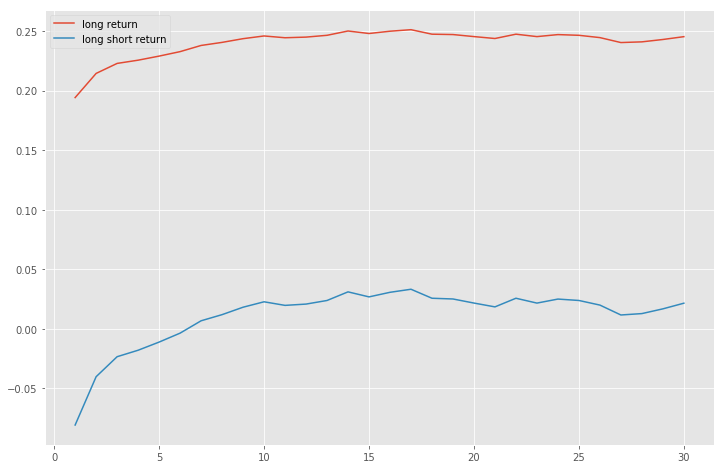

In [57]:
plt.plot(range(1,31), long_return_dict.values(), label='long return');
plt.plot(range(1,31), long_short_return_dict.values(), label='long short return');
plt.legend(loc='best');

#### 保存结果

#####  将已经计算得到的结果存入到excel表格中

`Signature: `
```python
store_in_excel(result, is_saving, save_name)
```
```
Docstring:
Implements:
    将result保存进excel中
    
Arguments:
    result -- python字典数据类型, 由single_pair_trading or batch_pair_trading计算得到
        keys分别是以下4个:"ratio","long_asset","long_return","long_short_return"
    is_saving -- 是否保存/保存哪些表 
              -- True, bool type, 保存所有的表进excel
              -- 'all', str type, 保存所有的表进excel
              -- "ratio","long_asset","long_return","long_short_return"中任意一个进行保存
              -- '0123', str type, 以数字代表4个key, 任意组合即为保存指定表
    save_name -- excel的文件名
              -- 若为None, 则随机生成一个8位英文字符的文件名
              -- str type, excel的文件名

Returns:
    None
```

In [ ]:
store_in_excel()

to do list :

save file / single pair trading & plotting / online data module